In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import daniel_utils as du
from pandas import *
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.metrics import r2_score

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/daniel/miniconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Import data

df = read_csv(filepath_or_buffer="csv/london.csv", header=0)

df = du.process_df(df)

Test subject 5080 has many cycles



In [3]:
subject_id = 5080

In [4]:
df = du.subject_cycles(df, subject_id)



#df = du.begin_date_to_datetime(df)


In [5]:
y = df['L_PREOVULATION'].values

Create array of features

In [6]:
# drop all non-feature columns
df = df.drop({'ID', 'GROUP_ID', 'CYCLE_ID', 'BIRTH_YR', 'BEGIN_DATE', 'N_GROUPS', 'N_CYCLES', 'DESC', 'TEMP_SCALE', 'CHILDREN'}, axis = 1)
X = df.drop({'L_CYCLE', 'L_PREOVULATION', 'L_PERIOD'}, axis = 1)


Find the number of days of the longest cycle in the group. Drop all the temperature columns that are after that max number of days.

In [7]:
max_l_cycle = int(df['L_CYCLE'].max())
for i in range(max_l_cycle + 1, 100):
    df = df.drop('TEMP' + str(i), axis = 1)

In [8]:
df.to_csv('csv/temp.csv')

Missing values - either fill with zero or impute data

In [9]:
# impute missing data
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
X = imp.fit_transform(X)


We are going to use cross validation to train and test the model.

sklearn.cross_validation.train_test_split will return X_train, X_test, y_train, and y_test

We will train the model on X_train and y_train.

In [10]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 38) (29, 38) (112,) (29,)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Variance score of the linear model's performance on test data (i.e. data that it has never seen before).

In [12]:
model.score(X_test, y_test) # R^2 value

0.55815154860205007

In [13]:
r2_score(y_test, model.predict(X_test))

0.55815154860205007

# Residual plot

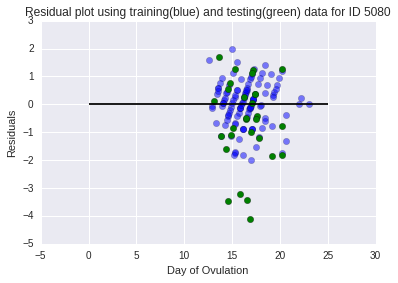

In [14]:
# residual plot
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=40, alpha = 0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=25)
plt.title('Residual plot using training(blue) and testing(green) data for ID ' + str(subject_id))
plt.ylabel('Residuals')
plt.xlabel('Day of Ovulation')

In [15]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Coefficients: 
 [ 0.11843992  0.11806204 -0.23750149  0.01948641  0.07018079 -0.03567613
  0.18247737  0.06615012  0.01907115  0.14174061  0.09327672  0.08040084
  0.06014989 -0.00129554 -0.12811812 -0.1800695  -0.09031883 -0.03447453
 -0.09739197  0.03573259  0.10634017 -0.26692594 -0.07759621 -0.08757473
 -0.01782324  0.22949964  0.03597341  0.05022479 -0.0054475  -0.05527817
 -0.02641988  0.14847817  0.09906529  0.34880551 -0.42310347 -0.74368875
  1.22321714  0.        ]
Residual sum of squares: 2.67
Variance score: 0.56


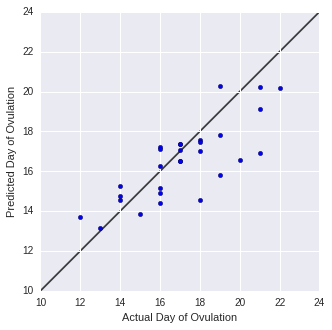

In [16]:
f, ax = plt.subplots(figsize=(5, 5))

ax.scatter(y_test, model.predict(X_test))

plt.xlabel("Actual Day of Ovulation")
plt.ylabel("Predicted Day of Ovulation")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#plt.figure(figsize=(10,1))

plt.show()